In [1]:
import quandl
import zipline
from zipline.api import record, symbol, order_target_percent
from zipline import run_algorithm
from datetime import datetime
import pytz


In [4]:
# quantum='_N85bWLCNCWz14smKHSi'
# path =' C:\Users\olono/.zipline\data\quantopian-quandl\2020-06-10T19;09;06.999754.'
#-b quantopian-quandl

# problem with zipline https://stackoverflow.com/questions/61097457/zipline-quandl-jsondecodeerror-expecting-value-line-1-column-1-char-0

# account in console IEX Cloud. You need a token and modify file benchmarks.py in zipline lybrary

In [2]:
%matplotlib inline
%load_ext zipline

In [6]:
%zipline -s 2010-1-1 -e 2020-1-1 -b quandl


C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,0.000000,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


In [7]:
def initialize(context):
    """
    initialize is a function which is calld once at the start of the
    algorithm. The context is for maintaining state throughout
    multiple trading events.
    """
    context.amzn = symbol('AMZN')
    # Here we reference the amazon stock

In [8]:
def handle_data(context, data):
    """
    This function is called at the end of each trading bar.
    It takes the context and the data object.
    The data object contains the state of the current securities.
    """
    #record(AMZN=data[context.amzn].price)
    record(AMZN=data.current(context.amzn, 'price'))
    # We record the price so we acn later track it.
    long_mavg = data.history(context.amzn, 'close', 41, '1d')[:-1].mean()
    # The long moving average is the mean of the prices of the last 40
    # days. In fact I take the last 41 days and throw the current day
    # away, since it is not finished.
    short_mavg = data.history(context.amzn, 'close', 5, '1d')[:-1].mean()
    # The short moving average is the mean of the prices of the last 20
    # days
    record(long_mavg=long_mavg)
    record(short_mavg=short_mavg)
    # We also record the two averages for later plotting
    if short_mavg > long_mavg:
        # If the short moving average is above the long moving average
        # we allocate 100% of our stock to AMZN
        if data.can_trade(context.amzn):
            # We need to check if the security is tradeable or if
            # trading is halted due to some event
            order_target_percent(context.amzn, 1.00)
    else:
        if data.can_trade(context.amzn):
            order_target_percent(context.amzn, -1.00)



In [9]:
# Set up the stuff for running the trading simulation
base_capital = 10000
start = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2020, 1, 1, 0, 0, 0, 0, pytz.utc)
# run the trading algorithm and save the results in perf
perf = run_algorithm(start, end, initialize, base_capital, handle_data,
        bundle = 'quantopian-quandl')

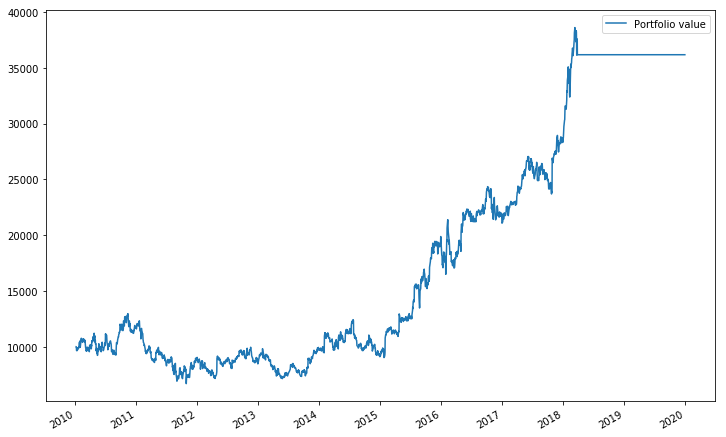

In [10]:
# Draw a nice plot of the value of our portfolio and save it
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
perf.portfolio_value.plot(label="Portfolio value")
# This is was generated by the run_algorithm
plt.legend()
plt.savefig('returns.png')


In [ ]:
plt.figure(figsize=(12,8))
perf.AMZN.plot(label='AMZN')
perf.long_mavg.plot(label='Long Moving Average 41d')
perf.short_mavg.plot(label='Short Moving Average 5d')
# These were recorded by the record function above
plt.legend()
plt.savefig('amzn.png')
